In [1]:
import numpy as np
import pandas as pd

In [4]:
url = 'http://github.com/WalePhenomenon/climate_change/blob/master/fuel_ferc1.csv?raw=true'
fuel_data = pd.read_csv(url, error_bad_lines= False)
fuel_data.describe(include = 'all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2006_12_182_2_8,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [5]:
# check for missing values
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [6]:
# use groupby to count the sum of each unique value in the fuel unit column
fuel_data.groupby('fuel_unit')['fuel_unit'].count()
fuel_data[['fuel_unit']] = fuel_data[['fuel_unit']].fillna(value='mcf')

In [7]:
# check if missing values have been filled 
fuel_data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [8]:
fuel_data.groupby('report_year')['fuel_unit'].count()
# group by the fuel type code year and print entries in all the groups formed

report_year
1994    1235
1995    1201
1996    1088
1997    1094
1998    1107
1999    1050
2000    1373
2001    1356
2002    1205
2003    1211
2004    1192
2005    1269
2006    1243
2007    1264
2008    1228
2009    1222
2010    1261
2011    1240
2012    1243
2013    1199
2014    1171
2015    1093
2016    1034
2017     993
2018     951
Name: fuel_unit, dtype: int64

In [10]:
fuel_data.groupby('fuel_type_code_pudl').first()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,,
coal,f1_fuel_1994_12_1_0_7,1,1994,rockport,ton,5377489.0,16.590000,18.590,18.530,1.121
gas,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,mcf,40533.0,1.000000,2.770,2.770,2.570
nuclear,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,kgU,2260.0,0.064094,28.770,0.000,0.450
oil,f1_fuel_1994_12_6_0_2,6,1994,clinch river,bbl,6510.0,5.875338,32.130,23.444,5.469
other,f1_fuel_1994_12_11_0_6,11,1994,w.f. wyman,bbl,55652.0,0.149719,14.685,15.090,2.335
waste,f1_fuel_1994_12_9_0_3,9,1994,b.l. england,ton,2438.0,0.015939,34.180,34.180,1.072


In [11]:
fuel_df1 = fuel_data.iloc[0:19000].reset_index(drop=True)
fuel_df2 = fuel_data.iloc[19000:].reset_index(drop=True)
# cheeck that the length of both dataframes sum to the expected length
assert len(fuel_data) == (len(fuel_df1) + len(fuel_df2))
# an inner merge will lose rows that do not match both dtatframes
pd.merge(fuel_df1, fuel_df2, how='inner')
# outer merge  returns all rows in both dataframes 
pd.merge (fuel_df1, fuel_df2, how='outer')

# removes rows from the right dataframes that do not have match with the left 
#and keeps all rows from the left
pd.merge (fuel_df1,fuel_df2, how='left')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590000,18.590,18.530,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592000,18.580,18.530,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130000,39.720,38.120,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950000,47.210,45.990,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000000,2.770,2.770,2.570
...,...,...,...,...,...,...,...,...,...,...,...
18995,f1_fuel_2009_12_182_1_9,182,2009,lake road,gas,mcf,340857.0,1.000000,4.711,4.711,4.711
18996,f1_fuel_2009_12_182_1_10,182,2009,lake road,oil,mcf,771.0,5.801544,84.899,84.899,14.634
18997,f1_fuel_2009_12_182_1_13,182,2009,iatan (18%),coal,ton,414142.0,16.718000,18.509,17.570,1.107
18998,f1_fuel_2009_12_182_1_14,182,2009,iatan (18%),oil,bbl,5761.0,5.537910,83.636,72.280,15.102


Text(0.5, 0, 'Fuel Unit')

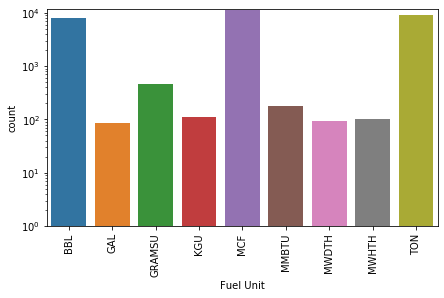

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
plt.figure(figsize=(7,4))
plt.xticks(rotation=90)
fuel_unit = pd.DataFrame({'unit':['BBL', 'GAL', 'GRAMSU', 'KGU', 'MCF', 'MMBTU', 'MWDTH', 'MWHTH', 'TON'],
            'count':[7998, 84, 464, 110, 11354, 180, 95, 100, 8958]})
sns.barplot(data=fuel_unit, x='unit', y='count')
plt.xlabel('Fuel Unit')

#Because of the extreme range of the values for the fuel unit, we can plot the barchart by taking the logarithm of the y-axis as follows:


g = sns.barplot(data=fuel_unit, x='unit', y='count')
g.set_yscale("log")
g.set_ylim(1, 12000)
plt.xlabel('Fuel Unit')

In [3]:
# select sample of the dataset
sample_df = fuel_data.sample(n=50,random_state=4)

NameError: name 'fuel_data' is not defined